# Entregable Data Preparation

In [3]:
#importamos librerías y herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

###Creamos el Data Frame y lo nombramos _df_bmw_

In [4]:
df_bmw = pd.read_csv("./data/bmw_pricing_v3.csv")

In [5]:
# ESTRUCTURA DE DATOS
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

###Revisamos si hay duplicados para eliminar

In [6]:
df_bmw[df_bmw.duplicated(keep=False)] #No hay duplicados
#Para comprobar que no hay duplicados hago un conteo inicial de mis filas, utilizo drop_duplicated y vuelvo a contar filas
# len(imdb)
# imdb.drop_duplicated(inplace=True)
# len(imdb)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


###Iniciamos con los  cambios, previa copia

In [7]:
df_bmw2 = df_bmw.copy()

In [8]:
df_bmw2.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [9]:
#Observamos nulos inferiores al 1% en las columnas, las eliminamos
for i in df_bmw2:
  if df_bmw2[i].isnull().sum() < 7:
   df_bmw2.dropna(subset=[i],inplace=True)

###Hacemos una copia para revisar variable por variable

In [10]:
#Empezamos a revisar las variables
df_bmw3 = df_bmw2.copy()

In [11]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3852 non-null   object 
 1   modelo                       4817 non-null   object 
 2   km                           4817 non-null   float64
 3   potencia                     4817 non-null   float64
 4   fecha_registro               2408 non-null   object 
 5   tipo_gasolina                4817 non-null   object 
 6   color                        4375 non-null   object 
 7   tipo_coche                   3368 non-null   object 
 8   volante_regulable            4817 non-null   object 
 9   aire_acondicionado           4335 non-null   object 
 10  camara_trasera               4817 non-null   object 
 11  asientos_traseros_plegables  1444 non-null   object 
 12  elevalunas_electrico         4817 non-null   object 
 13  bluetooth              

###Variable **Marca**
Observamos que tiene solo dos únicos valores y como sabemos que el dataset es de BMW, los nulos lo completamos con la moda y/o la misma marca. Al tratarse de toda la columna el mismo valor, decidimos eliminarla.

In [12]:
#df_bmw3['marca'].isnull().sum()
#df_bmw3['marca'].unique()
#df_bmw3['marca'].value_counts(normalize=True)
df_bmw3['marca'].fillna(df_bmw3['marca'].mode()[0], inplace=True) #Completo los nulos con la moda

C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\338064117.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw3['marca'].fillna(df_bmw3['marca'].mode()[0], inplace=True) #Completo los nulos con la moda


In [13]:
del(df_bmw3['marca'])

###Variable **Color**
Observamos su distribución con _normalize_ y lo reemplazamos los nulos con la moda

In [14]:
df_bmw3[df_bmw3['color'].isnull()]
#df_bmw3['color'].value_counts(normalize=True)
df_bmw3['color'].fillna(df_bmw3['color'].mode()[0], inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\881180119.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw3['color'].fillna(df_bmw3['color'].mode()[0], inplace=True)


In [15]:
df_bmw4 = df_bmw3.copy()

###Variable **tipo_coche**
Reemplazamos los nulos con _sin tipo_

In [16]:
df_bmw4['tipo_coche'].fillna('sin tipo', inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\3349981566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw4['tipo_coche'].fillna('sin tipo', inplace=True)


###Variable **aire_acondicionado**

In [17]:
df_bmw4['aire_acondicionado'].unique() #Evaluamos luego

array([True, False, nan], dtype=object)

###Variable **asientos_traseros_plegables**

In [18]:
#Eliminamos la columna ya que tienes mas del 75% nulos
del(df_bmw4['asientos_traseros_plegables'])

###Variable **bluetooth**

In [19]:
df_bmw4['bluetooth'].unique() #Evaluamos luego

array([nan, True, False], dtype=object)

###Variable **alerta_lim_velocidad**

In [20]:
df_bmw4['alerta_lim_velocidad'].unique() #Evaluamos luego

array([nan, True, False], dtype=object)

## Hacemos una copia y cambiamos el formato de fechas.

In [26]:
df_bmw5 = df_bmw4.copy()

In [27]:
df_bmw5['fecha_registro']=pd.to_datetime(df_bmw5['fecha_registro'])
df_bmw5['fecha_venta']=pd.to_datetime(df_bmw5['fecha_venta'])

## Creamos una nueva columna "Antiguedad" en años.

In [30]:
df_bmw5["antiguedad"]= round((df_bmw5["fecha_venta"]-df_bmw5["fecha_registro"])/ np.timedelta64(1,'m'))/(1440*365)

In [31]:
df_bmw5["antiguedad"]

0       5.920548
1            NaN
2       5.841096
3            NaN
4            NaN
          ...   
4838         NaN
4839    3.169863
4840    2.920548
4841    2.419178
4842         NaN
Name: antiguedad, Length: 4817, dtype: float64

## Completamos los nulos con la moda

In [32]:
df_bmw5["antiguedad"].fillna(df_bmw5["antiguedad"].mode()[0], inplace=True)

## Observamos nuestra nueva variable mediante un histrograma y nos damos cuenta que contiene valores negativos, lo cual no es posible. 


array([[<Axes: title={'center': 'antiguedad'}>]], dtype=object)

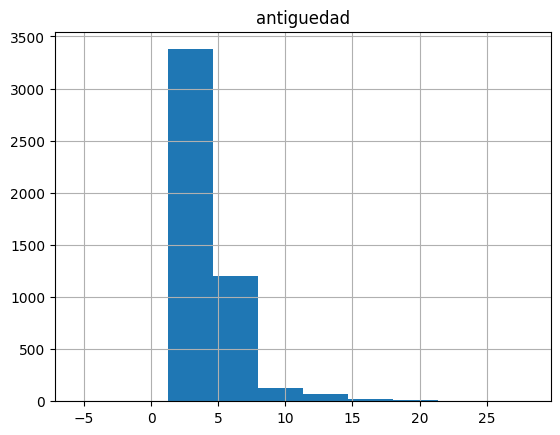

In [33]:
df_bmw5.hist('antiguedad')

In [35]:
#df_bmw5[df_bmw5['antiguedad']<0]
#Elimino valores menors a 0
df_bmw5.drop(df_bmw5[df_bmw5['antiguedad']<0].index, inplace=True)

## Ahora revisamos resto de variables

## Variable Km

In [36]:
#Observamos que existe valor menos a "0", procedemos a eliminar
df_bmw5.drop(df_bmw5[df_bmw5['km']<0].index, inplace=True)

## Variable Potencia

In [37]:
#Observamos que existe valor igual a "0", procedemos a eliminar
df_bmw5.drop(df_bmw5[df_bmw5['potencia']==0].index, inplace=True)

## Variable tipo_gasolina

In [38]:
# Renombramos "tipo gasolina" a "combustible"
df_bmw5.rename(columns={'tipo_gasolina': 'combustible'}, inplace=True)
# Vemos los valores unicos en tipo de gasolina y observamos error en tipeo dentro de los tipos
df_bmw5['combustible'].unique()
# Estandarizamos los nombre de tipos a minuscula
df_bmw5['combustible']=df_bmw5['combustible'].str.lower()

In [39]:
#hacemos copia
df_bmw6 = df_bmw5.copy()

## Volvemos a las variables Booleanas

In [40]:
# Preparamos una función que determine la proporción de cada variable_booleanas
def calcular_proporcion_booleanos(df, columna):
    """
    Calcula la proporción de valores booleanos en una columna de un DataFrame.

    Parámetros:
        - df: DataFrame de pandas.
        - columna: Nombre de la columna que se va a analizar.

    Retorna:
        La proporción de valores True y False en la columna especificada.
    """
    conteo_booleanos = df[columna].value_counts(normalize=True)
    proporcion_true = conteo_booleanos.get(True, 0) * 100
    proporcion_false = conteo_booleanos.get(False, 0) * 100
    return proporcion_true, proporcion_false


# Calcular la proporción de valores booleanos en la columna 'aire_acondicionado'
proporcion_true_EE, proporcion_false_EE= calcular_proporcion_booleanos(df_bmw6, 'aire_acondicionado')
proporcion_true_bluetooth,proporcion_false_bluetooth= calcular_proporcion_booleanos(df_bmw6, 'bluetooth')
proporcion_true_alerta_lim_velocidad, proporcion_false_alerta_lim_velocidad= calcular_proporcion_booleanos(df_bmw6, 'alerta_lim_velocidad')

## Preparamos funcion para rellenar nulos en columnas designadas con proporciones de True y False

In [41]:
def rellenar_nulos_con_proporciones(df, proporciones_true, proporciones_false):
    """
    Rellena los valores nulos en las columnas específicas de un DataFrame con proporciones de True y False.

    Parámetros:
        - df: DataFrame de pandas.
        - proporciones_true: Diccionario que mapea el nombre de la columna a su proporción de True.
        - proporciones_false: Diccionario que mapea el nombre de la columna a su proporción de False.

    Retorna:
        El DataFrame con los valores nulos rellenados según las proporciones especificadas.
    """
    for columna, proporcion_true in proporciones_true.items():
        proporcion_false = proporciones_false[columna]
        num_nulos = df[columna].isnull().sum()
        num_true = round(num_nulos * proporcion_true)
        num_false = num_nulos - num_true
        valores = [True] * num_true + [False] * num_false
        np.random.shuffle(valores)
        valores_serie = pd.Series(valores, index=df.index[df[columna].isnull()])
        df[columna].fillna(valores_serie, inplace=True)

    return df

# Diccionarios de proporciones de True y False
proporciones_true = {
    'aire_acondicionado': 0.8056,
    'bluetooth': 0.2449,
    'alerta_lim_velocidad': 0.5487
}

proporciones_false = {
    'aire_acondicionado': 1 - proporciones_true['aire_acondicionado'],
    'bluetooth': 1 - proporciones_true['bluetooth'],
    'alerta_lim_velocidad': 1 - proporciones_true['alerta_lim_velocidad']
}

# Utilizar la función para rellenar los valores nulos en las columnas con las proporciones correspondientes
df_bmw6 = rellenar_nulos_con_proporciones(df_bmw6, proporciones_true, proporciones_false)

C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\2693508799.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(valores_serie, inplace=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\2693508799.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna].fillna(valores_serie, in

In [42]:
# hacemos un info para ver como van nuestros datos.
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4813 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4813 non-null   object        
 1   km                    4813 non-null   float64       
 2   potencia              4813 non-null   float64       
 3   fecha_registro        2405 non-null   datetime64[ns]
 4   combustible           4813 non-null   object        
 5   color                 4813 non-null   object        
 6   tipo_coche            4813 non-null   object        
 7   volante_regulable     4813 non-null   object        
 8   aire_acondicionado    4813 non-null   bool          
 9   camara_trasera        4813 non-null   object        
 10  elevalunas_electrico  4813 non-null   object        
 11  bluetooth             4813 non-null   bool          
 12  gps                   4813 non-null   bool          
 13  alerta_lim_velocidad  4

## Observamos que hay variables de tipo Objeto que son booleanas y las casteamos

In [43]:
#Añadimos la columna con tipo booleana
list_to_cast=['volante_regulable','camara_trasera','elevalunas_electrico']
for i in list_to_cast:
  df_bmw6[i] = df_bmw6[i].astype(bool)

In [44]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4813 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4813 non-null   object        
 1   km                    4813 non-null   float64       
 2   potencia              4813 non-null   float64       
 3   fecha_registro        2405 non-null   datetime64[ns]
 4   combustible           4813 non-null   object        
 5   color                 4813 non-null   object        
 6   tipo_coche            4813 non-null   object        
 7   volante_regulable     4813 non-null   bool          
 8   aire_acondicionado    4813 non-null   bool          
 9   camara_trasera        4813 non-null   bool          
 10  elevalunas_electrico  4813 non-null   bool          
 11  bluetooth             4813 non-null   bool          
 12  gps                   4813 non-null   bool          
 13  alerta_lim_velocidad  4

## como hemos creado la columna "antiguedad", procedemos a borrar "fecha_registro" y "fecha_venta"

In [45]:
list_to_delete = ['fecha_registro','fecha_venta']
for i in list_to_delete:
  del(df_bmw6[i])

## Siguiendo con el análisis univariable y después de revisar el detalle de la variable modelo, observamos grupos que pertenecen a un cierto tipo_coche, los validamos y aseguramos los evidentes, trabajo sobre una copia nueva

In [47]:
df_bmw6['tipo_coche'].value_counts()

tipo_coche
sin tipo       1448
estate         1096
sedan           820
suv             753
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64

In [48]:
df_bmw7= df_bmw6.copy()

In [49]:
#Capturo los modelos que inicien con "X"
models_to_suv =[]
for i in df_bmw7['modelo'].unique():
  if ((i[0]=='X') & (len(i)==2)):
    #print(i)
    models_to_suv.append(i)

models_to_suv

['X3', 'X5', 'X1', 'X4', 'X6']

In [50]:
#Me aseguro que todos los modelos que inicien con "X" son suv
for i in models_to_suv:
  df_bmw7.loc[df_bmw7[(df_bmw7['modelo']==i)].index,'tipo_coche']="suv"

In [51]:
#Todos los modelos que contengan el término "tourer" son van
models_to_tourer =[]
for i in df_bmw7['modelo'].unique():
  if (i.find('Tourer')!=-1):
    #print(i)
    models_to_tourer.append(i)

#models_to_tourer
for i in models_to_tourer:
  df_bmw7.loc[df_bmw7[(df_bmw7['modelo']==i)].index,'tipo_coche']="van"

In [52]:
#Todos los modelo que contengan el término "coupe" son coupe
models_to_coupe =[]
for i in df_bmw7['modelo'].unique():
  if (i.find('Coupé')!=-1):
    #print(i)
    models_to_coupe.append(i)

#models_to_coupe
for i in models_to_coupe:
  df_bmw7.loc[df_bmw7[(df_bmw7['modelo']==i)].index,'tipo_coche']="coupe"

## Decidimos asignar modelos dentro de una nueva columna serie en particular, para esto reconocemos que cada serie engloba cierto tipo de modelos

In [53]:
df_bmw7['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [54]:
def asignar_serie(modelo):
    if modelo.startswith('1') or modelo.startswith('X1') or modelo.startswith('M1'):
        return 'Serie 1'
    elif modelo.startswith('2') or modelo.startswith(' Active Tourer') or modelo.startswith('M2'):
        return 'Serie 2'
    elif modelo.startswith('3') or modelo.startswith('X3') or modelo.startswith('M3') or modelo.startswith('i3'):
        return 'Serie 3'
    elif modelo.startswith('4') or modelo.startswith('X4') or modelo.startswith('M4'):
        return 'Serie 4'
    elif modelo.startswith('5') or modelo.startswith('X5') or modelo.startswith('ActiveHy') or modelo.startswith('M5'):
        return 'Serie 5'
    elif modelo.startswith('6') or modelo.startswith('X6') :
        return 'Serie 6'
    elif modelo.startswith('7') or modelo.startswith('i8'):
        return 'Serie 7'
    elif modelo.startswith('Z'):
        return 'Serie Z'
    else:
        return 'Otro'  # Si no coincide con ninguna serie conocida

In [55]:
# Creamos una nueva columna 'serie' aplicando la función asignar_serie a la columna 'modelo'
df_bmw7['serie'] = df_bmw7['modelo'].apply(asignar_serie)

In [56]:
df_bmw7['serie'].value_counts()

serie
Serie 3    2234
Serie 5    1398
Serie 1     837
Serie 4     149
Serie 6      81
Serie 7      55
Serie 2      53
Serie Z       6
Name: count, dtype: int64

In [57]:
df_bmw8 = df_bmw7.copy()

## Analizamos la variable precio

In [58]:
df_bmw8[df_bmw8['precio'] < 1500]

,modelo,km,potencia,combustible,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie
58,316,265751.0,85.0,petrol,silver,coupe,False,False,False,False,False,False,False,1000.0,4.002740,Serie 3
165,320,209208.0,135.0,diesel,black,estate,False,True,False,False,False,False,True,800.0,4.002740,Serie 3
170,320,146639.0,135.0,diesel,silver,estate,False,True,False,False,False,True,True,800.0,4.002740,Serie 3
171,316,159983.0,85.0,diesel,grey,estate,False,False,False,False,False,False,True,800.0,4.002740,Serie 3
174,520,270884.0,100.0,diesel,blue,estate,True,False,False,False,False,True,False,1100.0,4.002740,Serie 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,X1,170742.0,135.0,diesel,blue,suv,False,False,False,False,False,True,False,800.0,4.002740,Serie 1
3939,X1,140752.0,105.0,diesel,black,suv,False,False,False,False,False,False,True,800.0,4.002740,Serie 1
4356,X3,79685.0,190.0,diesel,black,suv,False,False,False,False,False,False,True,100.0,4.246575,Serie 3
4806,218,118323.0,110.0,diesel,white,sin tipo,False,False,False,False,False,False,False,800.0,3.421918,Serie 2


In [59]:
#Decidimos seguir el input inicial del negocio(al ser una empresa de segunda mano y no de piezas)
#Asumimos que los precios menor a 1500 son para desguace, con lo cual no los considerariamos para nuestro modelo.
df_bmw7.drop(df_bmw7[df_bmw7['precio'] < 1500].index,inplace=True)

<Axes: >

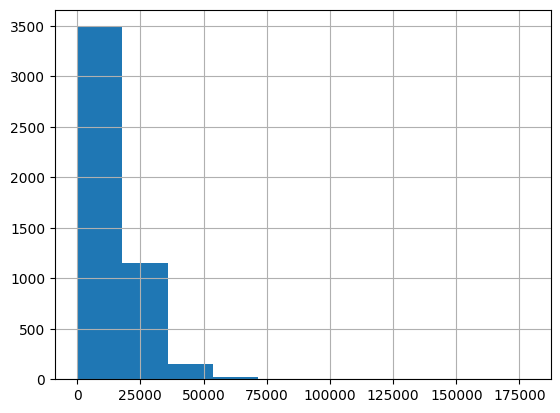

In [60]:
df_bmw8['precio'].hist()

In [61]:
df_bmw8['log_precio'] = np.log10(df_bmw8['precio'])

<Axes: >

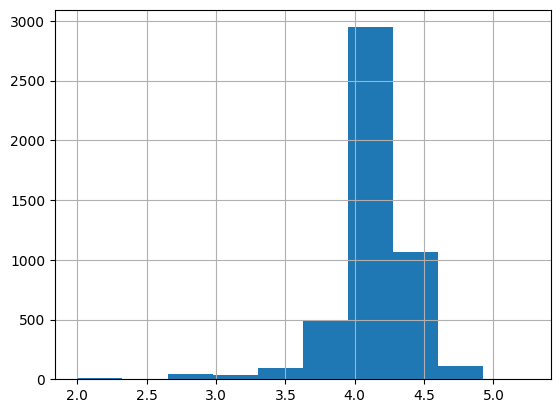

In [62]:
df_bmw8['log_precio'].hist()

## Hacemos la correlación para evaluar las variables, previa copia

In [64]:
df_bmw9 = df_bmw8.copy()

In [65]:
corr = df_bmw9.corr(numeric_only=True)

In [66]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,log_precio
km,1.000000,-0.049268,0.066722,0.013913,0.001848,0.045899,-0.026247,0.154802,-0.034530,-0.408625,0.316336,-0.436919
potencia,-0.049268,1.000000,0.327083,0.176248,0.313268,0.342631,0.196835,0.005675,0.421124,0.639144,-0.058935,0.507083
volante_regulable,0.066722,0.327083,1.000000,0.279971,0.253139,0.278393,0.122332,0.242236,0.187779,0.267769,0.040584,0.249389
aire_acondicionado,0.013913,0.176248,0.279971,1.000000,0.141930,0.250754,0.099643,0.333905,0.167220,0.216260,-0.119234,0.292468
camara_trasera,0.001848,0.313268,0.253139,0.141930,1.000000,0.198452,0.126099,0.060560,0.161800,0.253226,0.016080,0.198694
elevalunas_electrico,0.045899,0.342631,0.278393,0.250754,0.198452,1.000000,0.224810,0.201798,0.288508,0.263448,-0.063025,0.319036
bluetooth,-0.026247,0.196835,0.122332,0.099643,0.126099,0.224810,1.000000,0.109626,0.072151,0.173579,-0.034565,0.170293
gps,0.154802,0.005675,0.242236,0.333905,0.060560,0.201798,0.109626,1.000000,-0.062428,-0.009385,0.059186,0.043256
alerta_lim_velocidad,-0.034530,0.421124,0.187779,0.167220,0.161800,0.288508,0.072151,-0.062428,1.000000,0.381181,-0.085842,0.361532
precio,-0.408625,0.639144,0.267769,0.216260,0.253226,0.263448,0.173579,-0.009385,0.381181,1.000000,-0.285484,0.808817


In [67]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4813 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4813 non-null   object 
 1   km                    4813 non-null   float64
 2   potencia              4813 non-null   float64
 3   combustible           4813 non-null   object 
 4   color                 4813 non-null   object 
 5   tipo_coche            4813 non-null   object 
 6   volante_regulable     4813 non-null   bool   
 7   aire_acondicionado    4813 non-null   bool   
 8   camara_trasera        4813 non-null   bool   
 9   elevalunas_electrico  4813 non-null   bool   
 10  bluetooth             4813 non-null   bool   
 11  gps                   4813 non-null   bool   
 12  alerta_lim_velocidad  4813 non-null   bool   
 13  precio                4813 non-null   float64
 14  antiguedad            4813 non-null   float64
 15  serie                 4813

## Separo mis Variables en 3 grupos(numéricas, booleanas, categóricas)

In [68]:
target=['precio']
def get_list_var(dataset):
    list_numbers=[]
    list_booleans=[]
    list_categories=[]

    for i in dataset:
      if (i not in target) and (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and (len(dataset[i].unique()) != 2):
        list_numbers.append(i)
      elif (i not in target) and (dataset[i].dtype.kind == 'b') and (len(dataset[i].unique())==2):
        list_booleans.append(i)
      elif (dataset[i].dtype.kind != 'o' and (i not in target)):
        list_categories.append(i)

    return list_numbers, list_booleans, list_categories

In [69]:
l_numericas, l_booleanos, l_categoricas = get_list_var(df_bmw9)

## Cambiaremos nuestras variables Booleanas a "0 y 1"

In [70]:
l_numericas

['km', 'potencia', 'antiguedad', 'log_precio']

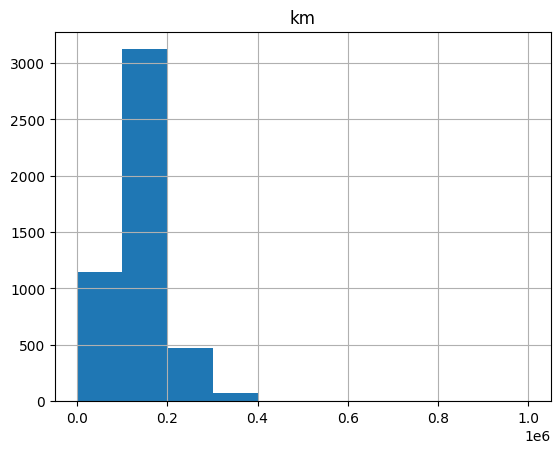

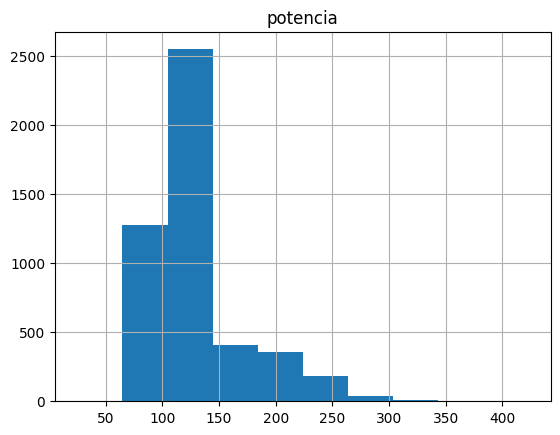

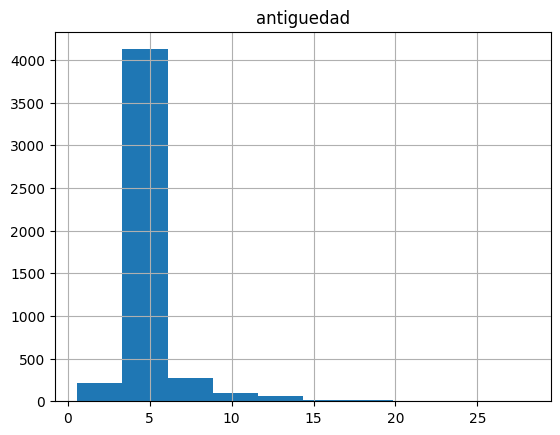

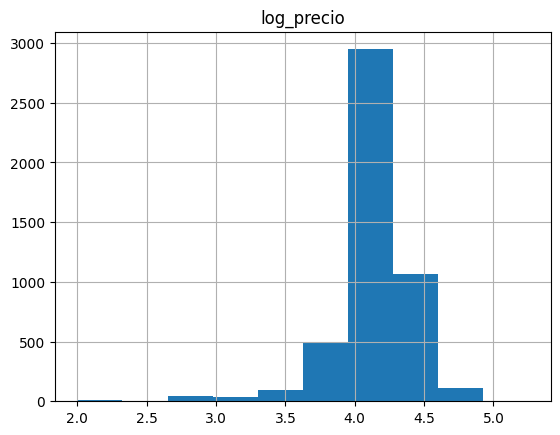

In [71]:
for i in l_numericas:
  df_bmw9.hist(i)

## Hacemos gráficos de relación para nuestras variables categóricas

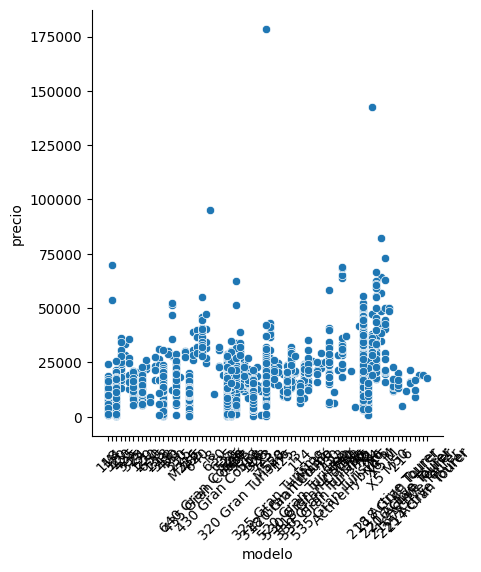

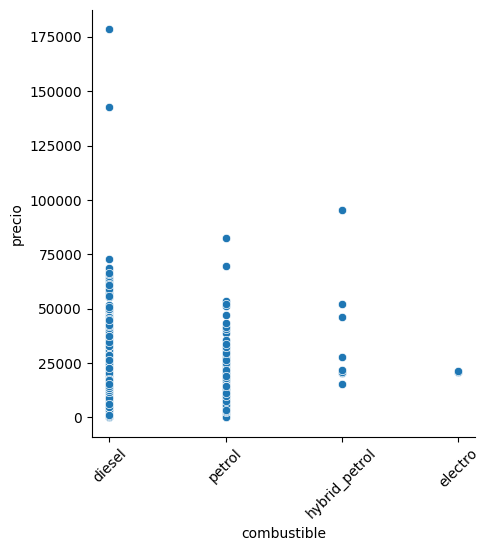

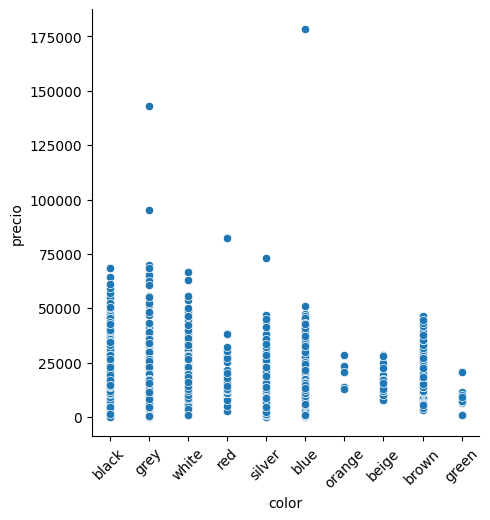

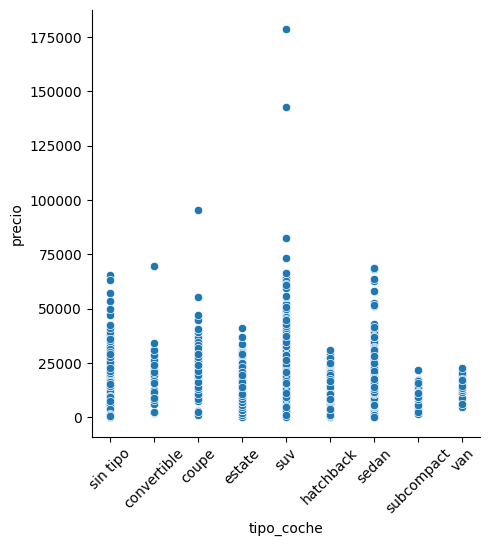

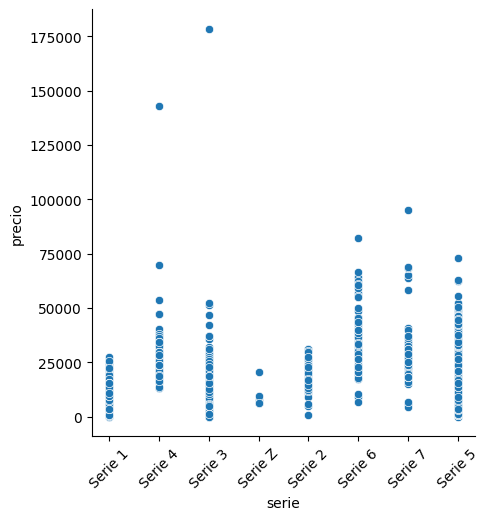

In [73]:
for i in l_categoricas:
  sns.relplot(data=df_bmw9, x=i, y="precio")
  plt.xticks(rotation=45)
plt.show()

In [74]:
#Observamos 2 outlaiers repetidos en nuestras gráficas, los revisamos a detalle
#df_bmw9[(df_bmw9['precio']>80000) & (df_bmw9['combustible']=='diesel')]
#Los eliminamos ya que no son coherentes precio y km
df_bmw9.drop(df_bmw9[(df_bmw9['precio']>80000) & (df_bmw9['combustible']=='diesel')].index, inplace=True)

In [75]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4811 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4811 non-null   object 
 1   km                    4811 non-null   float64
 2   potencia              4811 non-null   float64
 3   combustible           4811 non-null   object 
 4   color                 4811 non-null   object 
 5   tipo_coche            4811 non-null   object 
 6   volante_regulable     4811 non-null   bool   
 7   aire_acondicionado    4811 non-null   bool   
 8   camara_trasera        4811 non-null   bool   
 9   elevalunas_electrico  4811 non-null   bool   
 10  bluetooth             4811 non-null   bool   
 11  gps                   4811 non-null   bool   
 12  alerta_lim_velocidad  4811 non-null   bool   
 13  precio                4811 non-null   float64
 14  antiguedad            4811 non-null   float64
 15  serie                 4811

In [76]:
df_bmw9.head(1)

,modelo,km,potencia,combustible,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie,log_precio
0,118,140411.0,100.0,diesel,black,sin tipo,True,True,False,True,False,True,False,11300.0,5.920548,Serie 1,4.053078


In [77]:
df_bmw10= df_bmw9.copy()

In [78]:
df_bmw10['combustible'].value_counts()

combustible
diesel           4609
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [79]:
df_bmw10['color'].value_counts()

color
black     1928
grey      1066
blue       642
white      479
brown      302
silver     290
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

## Agrupamos color en "serie" y "personalizados", basandonos en que los de serie son los que habitalmente no te cobran como un extra y los personalizados son los colores diferentes a los de serie y por ende aplica un sobrecargo(lo cual nos da la pauta para darles valor diferente)

In [80]:
#Cambiamos los valores('black','white','red') a serie y los demás a personalizado
df_bmw10['group_color'] = np.where((df_bmw10['color'] =='black') | (df_bmw10['color'] =='white') | (df_bmw10['color'] =='red'), 'serie', 'personalizado')

In [81]:
df_bmw10['group_color'].value_counts()

group_color
serie            2454
personalizado    2357
Name: count, dtype: int64

## Para la variable combustible, color que lo agrupamos en group_color y la variable serie utilizo ordinalEncoder ya que le daré peso a mis items